In [1]:
# https://lmc2179.github.io/posts/confidence_prediction.html


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import scipy as sp
import scipy.stats as stats
sns.set()

In [2]:
week = 24  # time length of total observation (in weeks)
bmi = 22  # unit in lbs       
n = 21  # number of measurements per week
dist = 'normal'  # Daily weight fluctuation:  'normal' or 'uniform'

In [3]:
print("\nTotal weight loss time = ", week, "weeks")
print("Starting BMI = ", bmi)
print("Number of measurements per week = ", n)

if dist == 'uniform':
    print('\nUNIFORM Distribution for Daily Weight Fluctuation')
elif dist == 'normal':
    print("\nNORMAL Distribution for Daily Weight Fluctuation")


Total weight loss time =  24 weeks
Starting BMI =  22
Number of measurements per week =  21

NORMAL Distribution for Daily Weight Fluctuation


In [4]:
wl = 1 - 0.01

In [5]:
df = pd.DataFrame()
# data = np.empty([1, 21])
x = []
y = []

In [6]:
# Create the x axis for the time columns from week 1 - week 24

#for j in range(n):
#    meas = [x for x in range(1, 25)]
#    x = np.append(x, meas, axis=0)  # time
#x = [int(x) for x in x]
days = week * 7 +1
x = [x for x in range(1,days)]
#print(x)
x = sorted(x)
x = np.transpose(x)
x = np.repeat(x,n/7)
#print(x)

In [7]:
# Create y axis for the BMI measurements

for i in range(week):
    time = i + 1
    avg_bmi = bmi * wl ** i
    # print(time)
    # print("%.2f" % avg_weight)
    #if dist == 'uniform':
    #ll = avg_bmi * (1 - 0.0174)  # 1.74% body fat fluctuation by imaging (or close to the weight fluc)
    #ul = avg_bmi * (1 + 0.0174)
    # w = np.random.uniform(ll, ul, n)  # assuming uniform distribution during a day
    #elif dist == 'normal':
    #avg_bmi = np.repeat(avg_bmi,7)
    #print(avg_bmi)
    w = np.random.normal(avg_bmi, 1, n)  # assuming normal distribution during a day
        # w = np.expand_dims(w, axis=0)
        # print(type(w))


    # col_list = ['week' + str(x) for x in range(1, week+1)]
    # weeks = [x for x in range(1, 21)]
    # print(weeks)
    y = np.append(y, w, axis=0)  # weight
    

#y = np.repeat(y, 7)
y = np.transpose(y)
print(y.shape)

data = {'Time': [x], 'Weight': [y]}
df = pd.DataFrame(data)
# print(df)
print(x.shape)

(504,)
(504,)


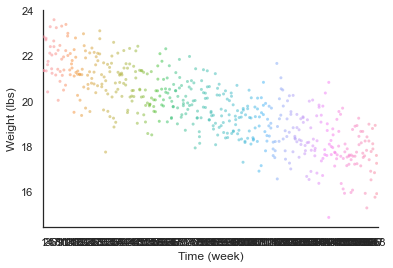

In [8]:
sns.set_style("white")
# sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
#if weight == 120:
#    plt.ylim([110, 130])

# ax = sns.swarmplot(x=x, y=y, s=3, alpha=0.6, color='k')
ax = sns.stripplot(x=x, y=y, s=3, alpha=0.5, jitter=0.2)
# ax = sns.stripplot(x=x, y=y, s=3, alpha=0.6, color='k')
# ax = sns.boxplot(x=x,y=y, color='gray')
# ax = sns.boxplot(x=x, y=y, boxprops=dict(alpha=0.5))

# ax = sns.boxplot(x=x, y=y, color='white')

# plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
# plt.setp(ax.lines, color='k')

ax.set_xlabel("Time (week)")
ax.set_ylabel("Weight (lbs)")
# ax.set_title(txt)
# plt.title('BMI = 30')
# plt.scatter(x, y)
sns.despine()
plt.show()

# ax = sns.swarmplot(x="week22", y='week1', data=df)

# avg_weight = [weight * i for i in range(2, week)]

In [9]:
import statsmodels.api as sm

In [10]:
X = sm.add_constant(x)
model = sm.OLS(y,X)
results = model.fit()
res = sm.OLS(y, X).fit()

In [12]:

dt = res.get_prediction(X).summary_frame(alpha = 0.95)
#print(dt.head)
y_prd = dt['mean']
yprd_ci_lower = dt['obs_ci_lower']
yprd_ci_upper = dt['obs_ci_upper']
#print(pd.DataFrame(np.column_stack([y_prd, yprd_ci_lower, yprd_ci_upper])))

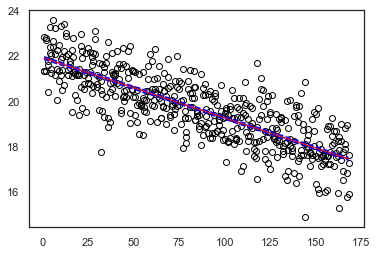

In [14]:
plt.plot(x, y, linestyle = "None", marker = "o",
         markerfacecolor = "None", color = "black")
plt.plot(x, y_prd, color = "red")
plt.plot(x, yprd_ci_lower, color = "blue", linestyle = "--")
plt.plot(x, yprd_ci_upper, color = "blue", linestyle = "--")
plt.show()

/Users/jiehawes/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


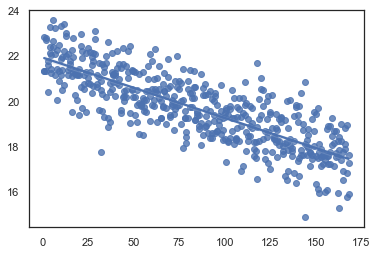

In [16]:
# import libraries
import pandas
import numpy
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
# import libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
  
# create regression plot
ax = sns.regplot(x, y, ci=80)

In [17]:
#!pip install tsmoothie
#print(data)

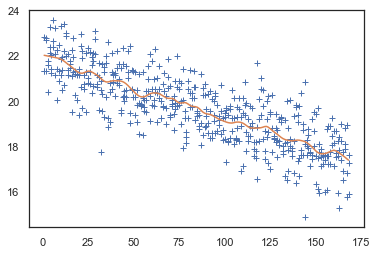

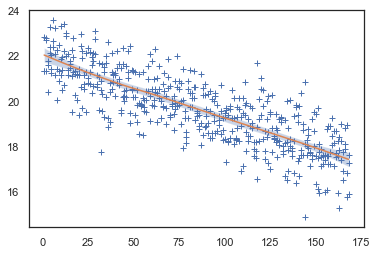

In [18]:
from skmisc.loess import loess
import numpy as np
import pylab as plt


#x = np.linspace(0,2*np.pi,100)
#y = np.sin(x) + np.random.random(100) * 0.4

l = loess(x,y)
l.fit()
pred = l.predict(x, stderror=True)
conf = pred.confidence()

lowess = sm.nonparametric.lowess(y, x, frac=0.1)

plt.plot(x, y, '+')
plt.plot(lowess[:, 0], lowess[:, 1])
plt.show()


lowess = pred.values
ll = conf.lower
ul = conf.upper

plt.plot(x, y, '+')
plt.plot(x, lowess)
plt.fill_between(x,ll,ul,alpha=0.3)
plt.show()

In [19]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from tsmoothie.utils_func import sim_randomwalk
from tsmoothie.smoother import LowessSmoother

# generate 3 randomwalks of lenght 200
# operate smoothing
smoother = LowessSmoother(smooth_fraction=0.1, iterations=1)
smoother.smooth(data)

# generate intervals
low, up = smoother.get_intervals('prediction_interval')

points = smoother.data[0]
up_points = up[0]
low_points = low[0]

# operate smoothing
smoother = LowessSmoother(smooth_fraction=0.1, iterations=1)
smoother.smooth(data)

# generate intervals
low, up = smoother.get_intervals('prediction_interval')

# plot the smoothed timeseries with intervals
plt.figure(figsize=(18,5))

for i in range(3):

    plt.subplot(1,3,i+1)
    plt.plot(smoother.smooth_data[i], linewidth=3, color='blue')
    plt.plot(smoother.data[i], '.k')
    plt.title(f"timeseries {i+1}"); plt.xlabel('time')

    plt.fill_between(range(len(smoother.data[i])), low[i], up[i], alpha=0.3)

ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:
data = {'x':x, 'y':y}
frame = pd.DataFrame(data, columns=['x', 'y'])
frame = pd.DataFrame(data)
sns.lmplot('x', 'y', frame, ci=95)

In [ ]:
plt.fill_between(x,ll,ul,alpha=0.2)

In [ ]:
pred = l.predict(x, stderror=True)
conf = pred.confidence()

lowess = pred.values
ll = conf.lower
ul = conf.upper

plt.plot(x, y, '+')
plt.plot(x, lowess)
plt.fill_between(x,ll,ul,alpha=.83)
plt.show()

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

#plt.rcParams["figure.figsize"] = [7.50, 3.50]
#plt.rcParams["figure.autolayout"] = True

#x = np.arange(0, 10, 0.05)
#y = np.sin(x)

# Define the confidence interval
ci = 0.1 * np.std(y) / np.mean(y)
print(ci)
#ci = 2* np.std(y)/np.sqrt(len(x))

plt.scatter(x, y, color='blue', lw=1)

plt.fill_between(x, (y-ci), (y+ci), color='yellow', alpha=0.9)

plt.show()

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

#some example data
#x = np.linspace(0.1, 9.9, 20)
#y = 3.0 * x
#some confidence interval
ci = 1.96 * np.std(y)/np.sqrt(len(x))

fig, ax = plt.subplots()
ax.scatter(x,y)
ax.fill_between(x, (y-ci), (y+ci), color='y', alpha=.3)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tsmoothie.smoother import *
from tsmoothie.utils_func import sim_randomwalk

# generate 10 randomwalks of length 200
np.random.seed(33)
data = sim_randomwalk(n_series=10, timesteps=200, 
                      process_noise=10, measure_noise=30)

# operate smoothing
smoother = LowessSmoother(smooth_fraction=0.1, iterations=1)
smoother.smooth(data)

# generate intervals
low, up = smoother.get_intervals('prediction_interval', confidence=0.05)

# plot the first smoothed timeseries with intervals
plt.figure(figsize=(11,6))
plt.plot(smoother.smooth_data[0], linewidth=3, color='blue')
plt.plot(smoother.data[0], '.k')
plt.fill_between(range(len(smoother.data[0])), low[0], up[0], alpha=0.3)